# Random Networks

Будем рассматривать случайные графы Эрдёша-Реньи.

In [1]:
import networkx as nx
from math import factorial, e
from collections import Counter
from operator import add
from functools import reduce
from rnets import gen_random_graph_with_degree_dist

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

def get_node_degree_theoretical_dist(N, max_deg):
    return [N * 1.0 / (factorial(k) * e) for k in range(max_deg + 1)]


def review_with_aggregation(N, p, nsamples):
    if nsamples == 1:
        G, counter = gen_random_graph_with_degree_dist(N, p)
    else:
        counter = reduce(add, map(lambda _: gen_random_graph_with_degree_dist(N, p)[1], range(nsamples)))
    deg, count = zip(*sorted(counter.items()))
    count = [float(x) / nsamples for x in count]
    th_count = get_node_degree_theoretical_dist(N, max(deg))
    print(f"Degree distribution: {list(zip(deg, count))}")

    fig, ax = plt.subplots(figsize=(12, 7))
    plt.bar(deg, count, width=0.8, color='orange', label="generated", alpha=0.5)
    plt.bar(range(max(deg) + 1), th_count, width=0.8, color='blue', label='theoretical', alpha=0.5)

    plt.title(f"Degree histogram for aggregated {nsamples=}")
    plt.xlabel('degree')
    plt.ylabel('count')
    plt.legend()
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    if nsamples == 1:
        plt.axes([0.5, 0.5, 0.4, 0.4])
        Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
        pos = nx.spring_layout(G)
        plt.axis("off")
        nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
        nx.draw_networkx_edges(G, pos, alpha=0.4)


## 1. Моделирование распределения вершин в случайном графе

Рассмотрим, как меняется распределение вершин по степеням
* Для разных $k = p(N - 1)$
* Для разных размеров наборов графов, из которых строятся агрегированные распредения

### $k = 1$

In [2]:
N = 101
k = 1
p = k * 1. / (N - 1)

Degree distribution: [(0, 35.0), (1, 31.0), (2, 25.0), (3, 7.0), (4, 3.0)]


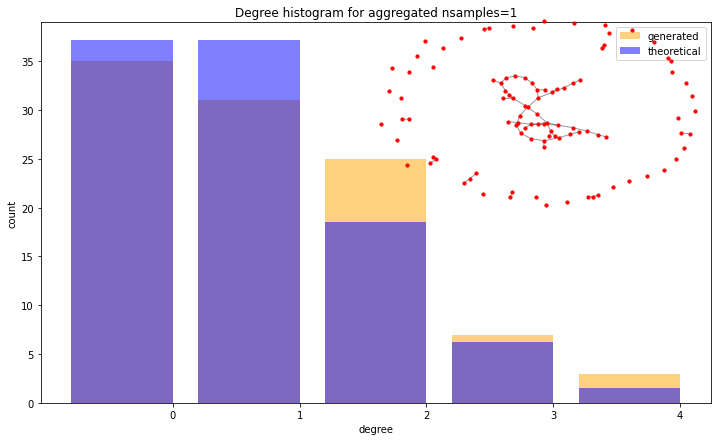

In [3]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 35.75), (1, 37.55), (2, 19.6), (3, 6.2), (4, 1.57), (5, 0.28), (6, 0.04), (7, 0.01)]


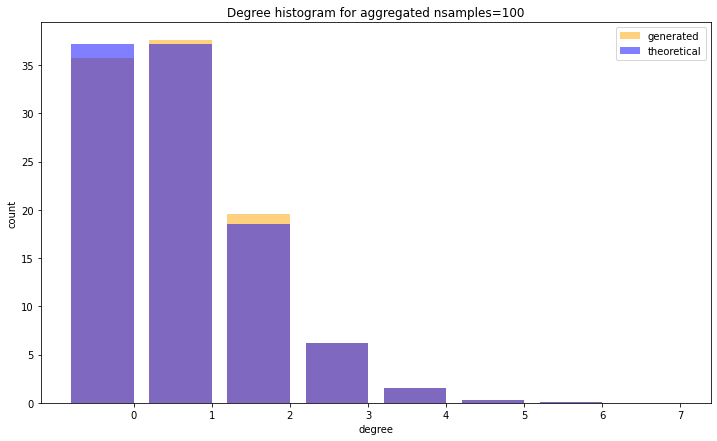

In [4]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 36.717), (1, 37.271), (2, 19.002), (3, 6.232), (4, 1.439), (5, 0.286), (6, 0.048), (7, 0.005)]


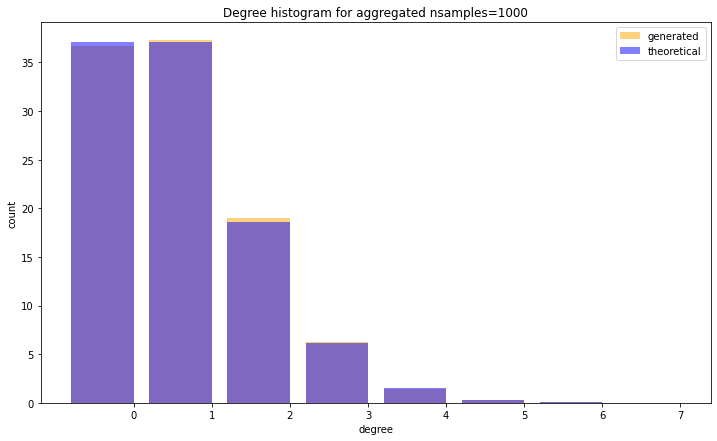

In [5]:
review_with_aggregation(N, p, 1000)

Мы видим, что полученные распределения крайне похожи на теоретические, а аггрегация только улучшает показатель близости.

### $k = 2$

In [6]:
N = 101
k = 2
p = k * 1. / (N - 1)

Degree distribution: [(0, 9.0), (1, 23.0), (2, 30.0), (3, 22.0), (4, 9.0), (5, 3.0), (6, 4.0), (8, 1.0)]


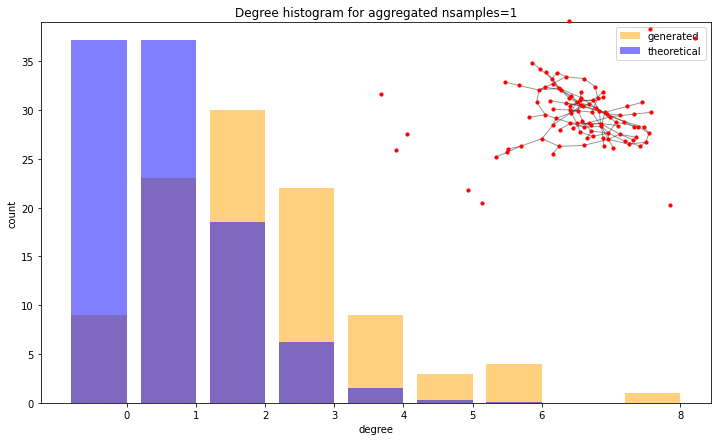

In [7]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 12.31), (1, 28.03), (2, 27.55), (3, 18.48), (4, 9.23), (5, 3.6), (6, 1.4), (7, 0.32), (8, 0.05), (9, 0.03)]


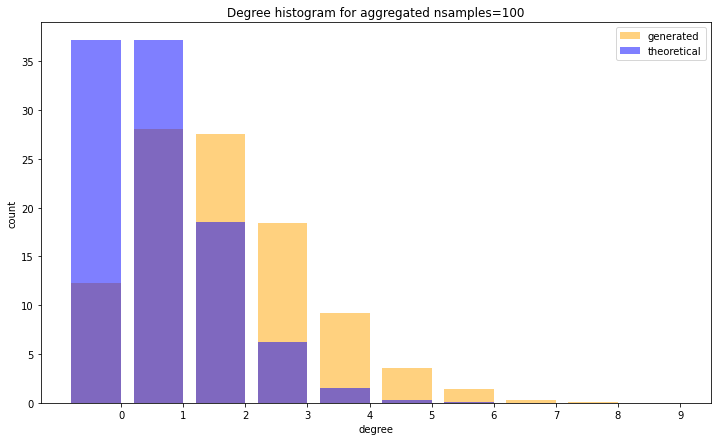

In [8]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 13.212), (1, 27.356), (2, 27.614), (3, 18.371), (4, 9.164), (5, 3.611), (6, 1.244), (7, 0.344), (8, 0.07), (9, 0.012), (10, 0.002)]


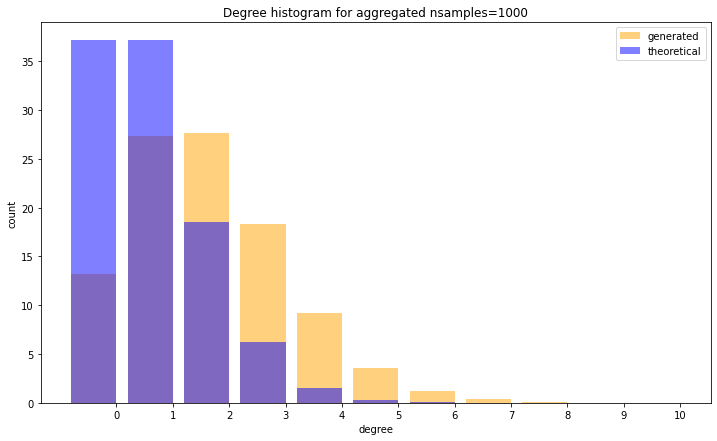

In [9]:
review_with_aggregation(N, p, 1000)

### $k = 3$

In [10]:
N = 101
k = 3
p = k * 1. / (N - 1)

Degree distribution: [(0, 5.0), (1, 18.0), (2, 27.0), (3, 23.0), (4, 7.0), (5, 13.0), (6, 5.0), (7, 1.0), (8, 1.0), (9, 1.0)]


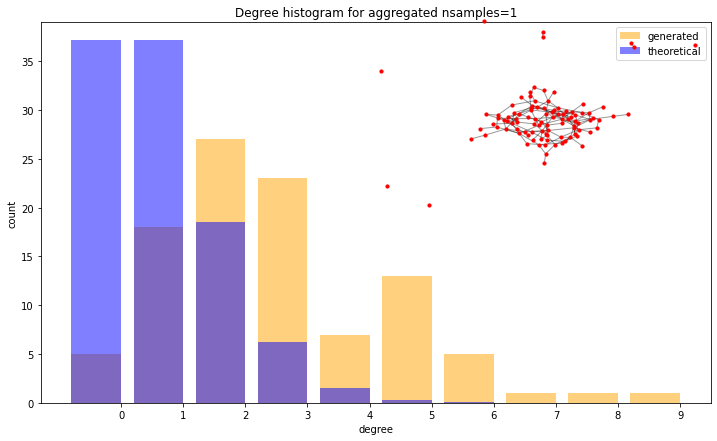

In [11]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 4.73), (1, 15.67), (2, 23.08), (3, 22.59), (4, 17.17), (5, 10.06), (6, 4.77), (7, 1.92), (8, 0.64), (9, 0.31), (10, 0.05), (11, 0.01)]


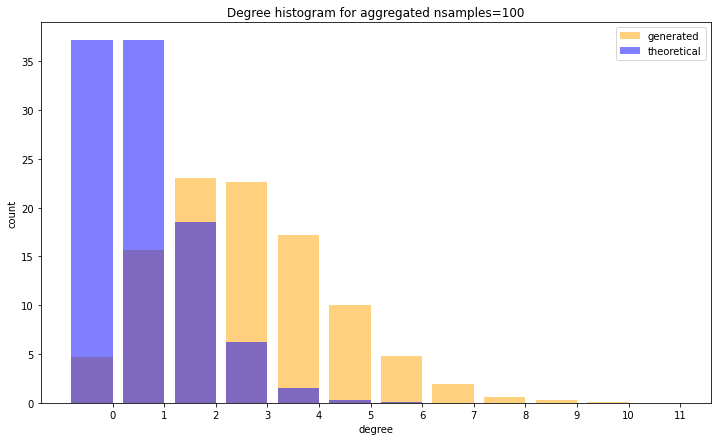

In [12]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 4.767), (1, 14.839), (2, 22.708), (3, 23.203), (4, 16.962), (5, 10.211), (6, 5.088), (7, 2.089), (8, 0.79), (9, 0.226), (10, 0.09), (11, 0.018), (12, 0.007), (13, 0.002)]


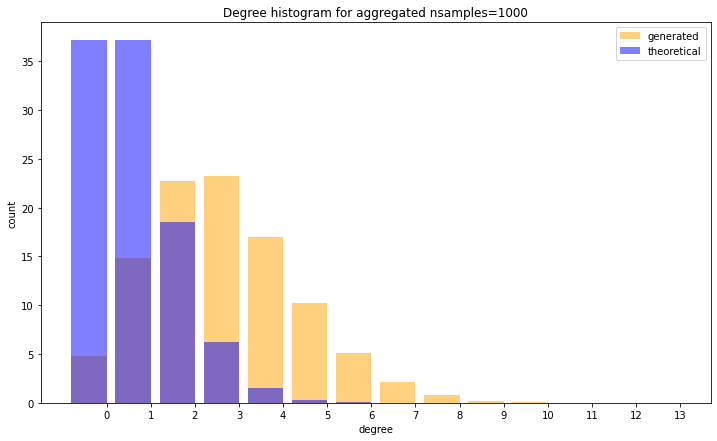

In [13]:
review_with_aggregation(N, p, 1000)

Для $k = 2$ и $k = 3$ мы замечаем значительную расходимость с теоретическими соображениями.
Это может исходить из следующих соображений:
* Я использовал формулу теоретического распределения, не учитывающего $k$. Скорее всего, её можно вывести, но вот не успел.
* С ростом $k$ растёт и связность отдельных компонент графа, что видно на первых графиках для каждого $k$.
Таким образом, для $k = 2$ и $k = 3$ число вершин, не имеющих связей или имеющих лишь одну, не столь велико.
А значит, различные генерации сильнее отличаются в степенях отдельных першин. Таким образом, агрегация выступает инструментом сглаживания.

## Задание 2

Посмотрим на распределения связных компонент по размеру в зависимости от различных $k$.

(Я делал не как гистограммы, потому что, как по мне, так более понятно)

$k = 0.5$

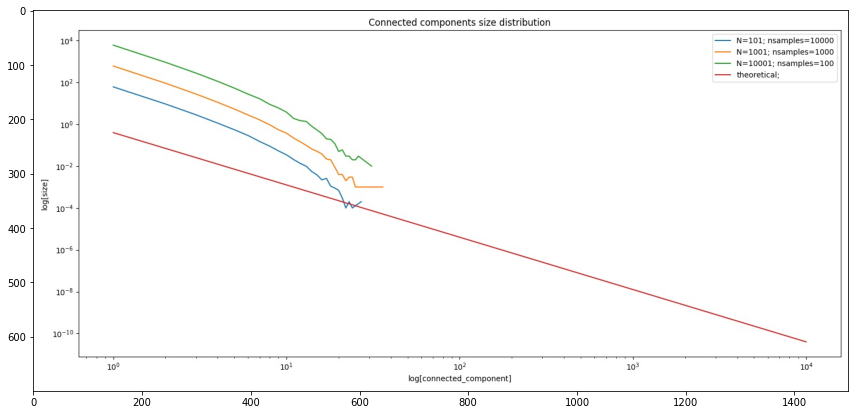

In [14]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.5.jpg")
plt.imshow(img)

Динамика близка к теоретической, гигантской компоненты не наблюдается.

$k = 0.9$

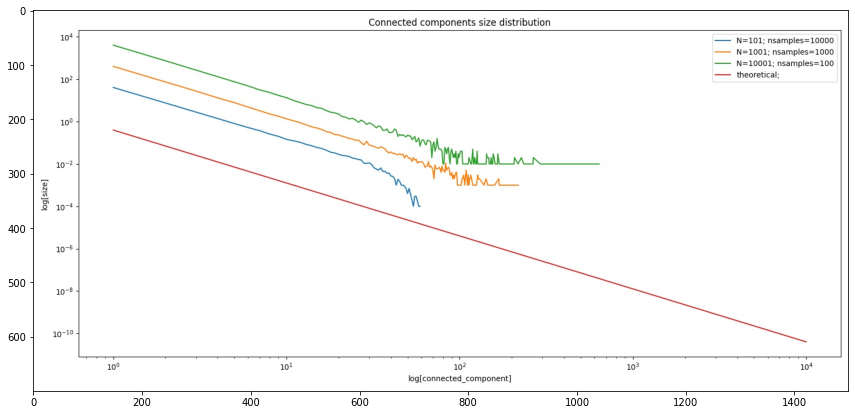

In [15]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.9.jpg")
plt.imshow(img)

Заметно появление крупных кластеров, но крайне мало. Для большого графа динамика стала расходиться с теоретической на хвостах.

$k = 0.98$

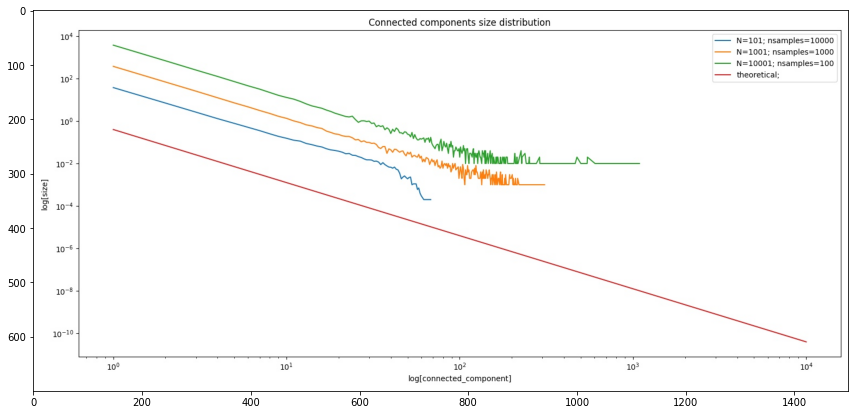

In [14]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.98.jpg")
plt.imshow(img)

На большом графе 2 самых большиъ кластера значительно оторвались от других, динамика среднего графа стала расходиться с теоретической на хвостах.

$k = 1$

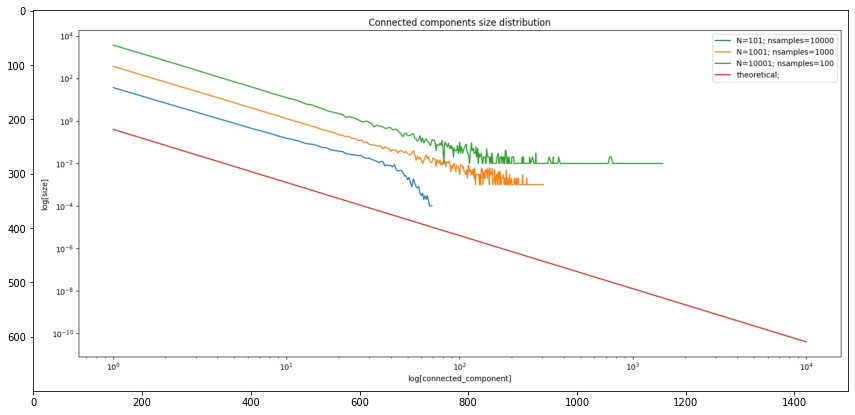

In [17]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.0.jpg")
plt.imshow(img)

Два кластера на большом графе слились в гигантский кластер.

$k = 1.02$

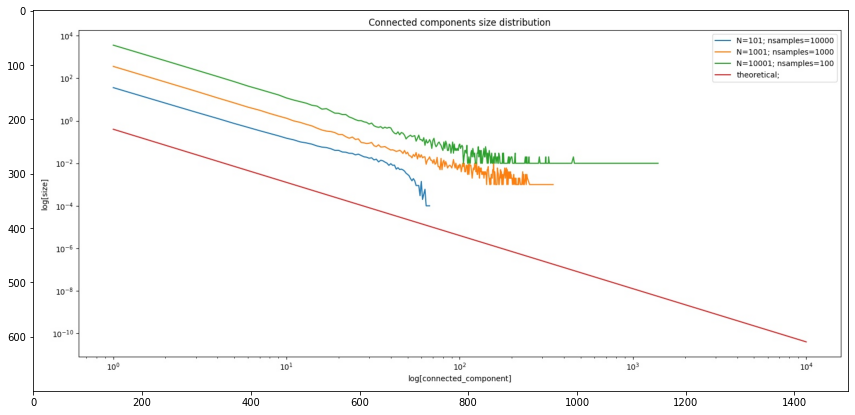

In [18]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.02.jpg")
plt.imshow(img)

Значимых изменений по сравнению с предыдущим нет.

$k = 1.1$

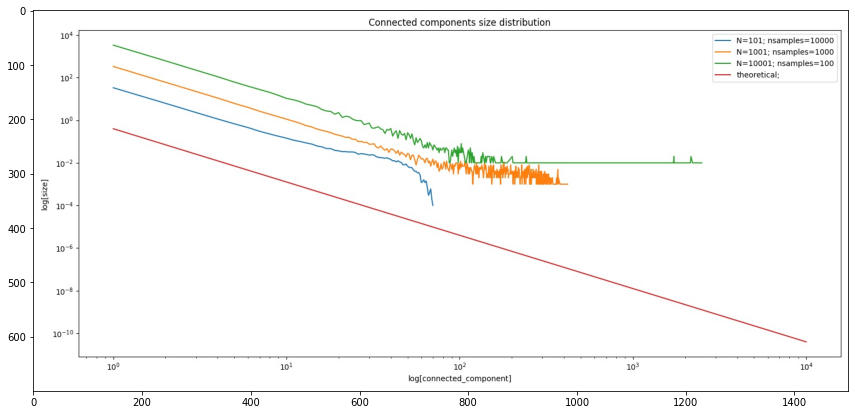

In [19]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.1.jpg")
plt.imshow(img)

* На большом графе гигантские кластеры резко выросли в размерах
* Участилось число степеней вывсокой размерности в среднем графе
* Малый граф стал отколняться от теоретической динамики

$k = 2$

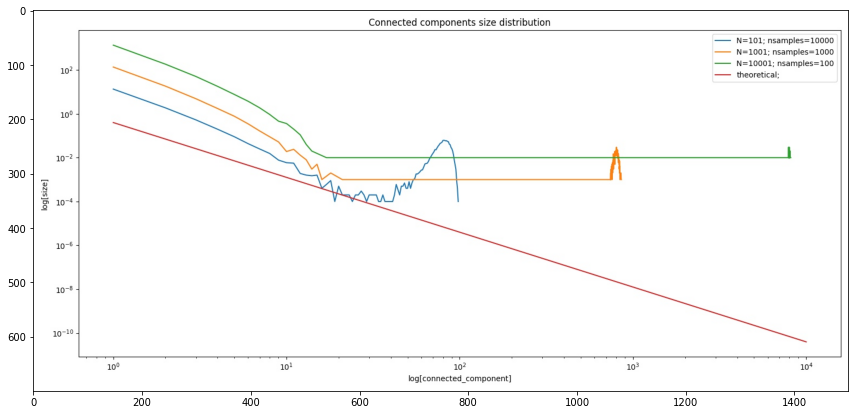

In [20]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=2.0.jpg")
plt.imshow(img)

Крайне явное формирование единой гигантской компоненты вля всех графов.

Так же, дополнительно отмечу, что аггрегирование опять выполняет функцию сглаживания.
Мы можем это проследить на том, что малый граф с сильным агрегированием гасит все выбросы в виде большиъ кластеров в то время как для слабо-агрегированного большого графа выбросы почти не демпфируются.

### 3. Посмотрим на динамику максимальной связной компоненты

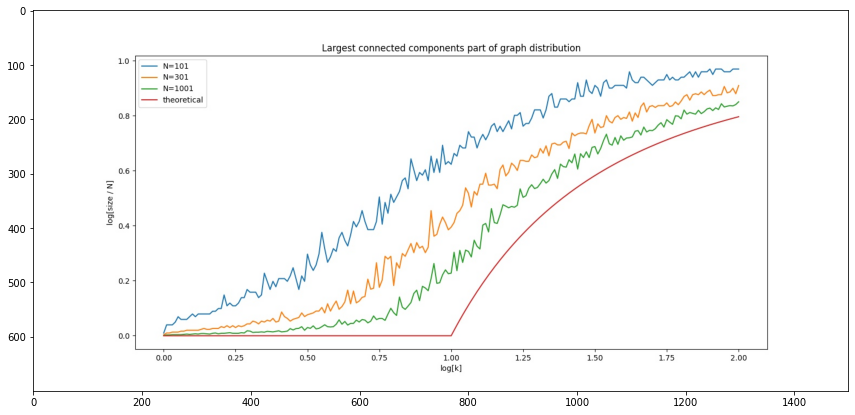

In [15]:
plt.figure(figsize=(15, 7))
img = imread("images/3.jpg")
plt.imshow(img)

Можем наблюдать, что при увеличении $N$, растёт и близость численного моделлирования к теоретического.
Что и не удивительно, ведь теоретическая выводится при $N \rightarrow +\infty$.

### 4. Доля графа без цикла